## Zad1b

### Import pointscloud library

In [36]:
import sys
import os
import numpy as np
import time 

sys.dont_write_bytecode = True

sys.path.insert(0, '/home/jovyan/work/lib') 
from point_cloud import PointsCloud

### 1. Загрузка облака точек 

In [37]:
pc = PointsCloud.from_file("/home/jovyan/work/data/bun315.xyz", spatial_dims=3)

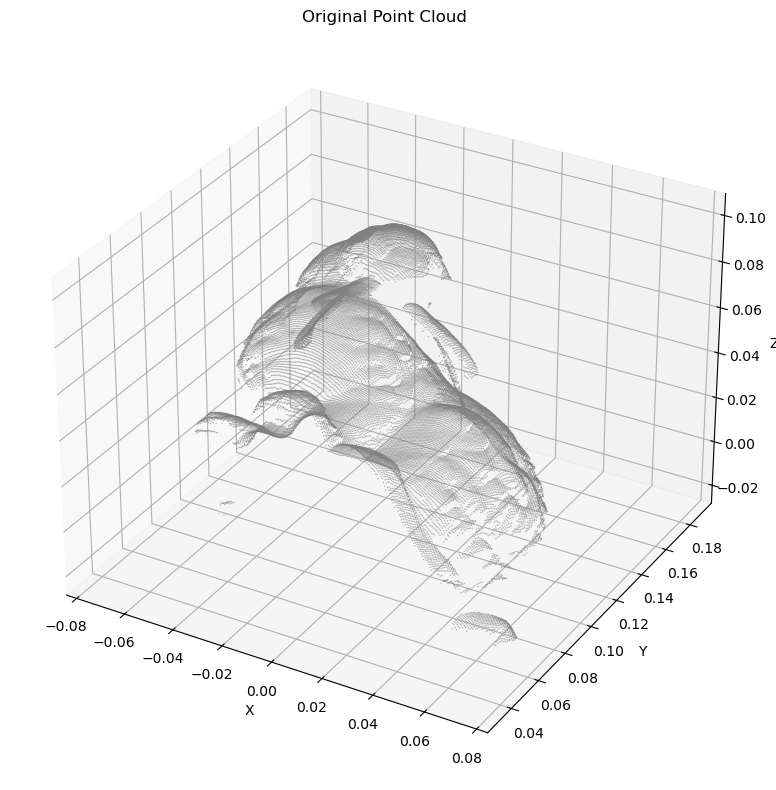

In [38]:
pc.visualize(title="Original Point Cloud", backend='matplotlib', save=True)

### 2.  Random subsampling

In [43]:
start_time = time.perf_counter()

pc_random = pc.subsample_random(0.5)

end_time = time.perf_counter()
print(f"Random subsampling requiers: {end_time - start_time} s")

Random subsampling requiers: 0.0030834960052743554 s


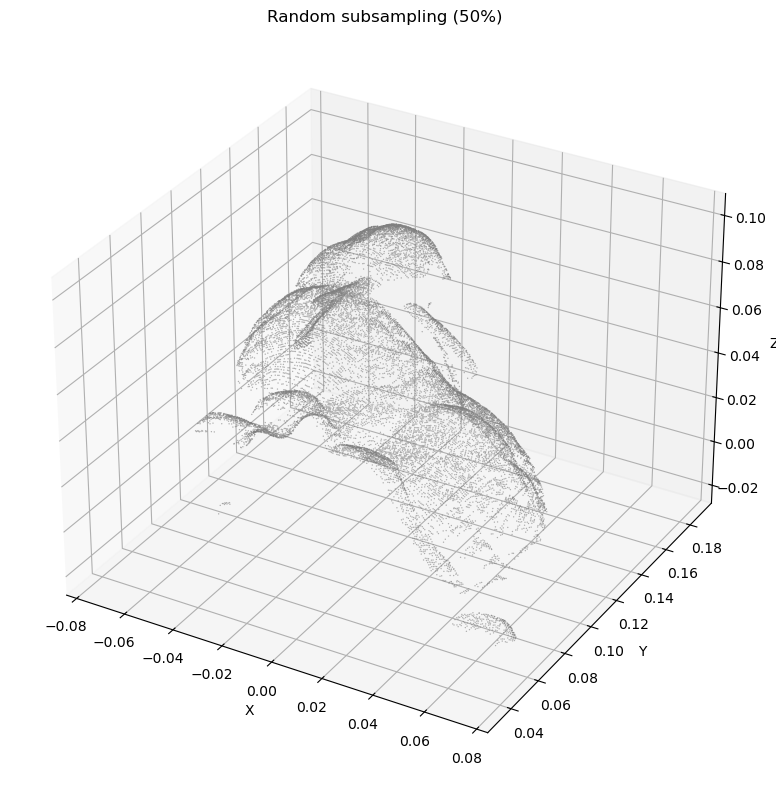

In [44]:
pc_random.visualize(title="Random subsampling (50%)", backend='matplotlib', save=True)

### 3. Voxel subsampling

In [45]:
start_time = time.perf_counter()

pc_voxel = pc.subsample_voxel(voxel_size=0.001)

end_time = time.perf_counter()
print(f"Voxel subsampling requiers: {end_time - start_time} s")

Voxel subsampling requiers: 5.706927734980127 s


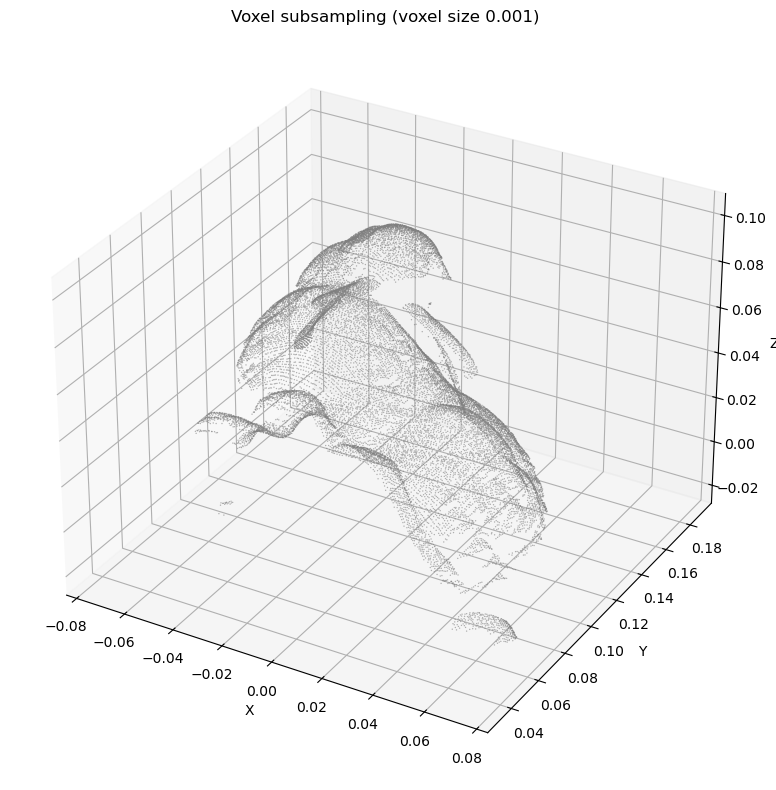

In [46]:
pc_voxel.visualize(title="Voxel subsampling (voxel size 0.001)", backend='matplotlib', save=True)

### 4. FPS subsampling

In [47]:
fraction = 0.5
k = int(fraction * len(pc.data))
print(f"Number of points in subsampled point cloud: {k}")

start_time = time.perf_counter()

pc_fps = pc.subsample_fps(k)

end_time = time.perf_counter()
print(f"FPS subsampling requiers: {end_time - start_time} s")

Number of points in subsampled point cloud: 17668
FPS subsampling requiers: 5.649811518989736 s


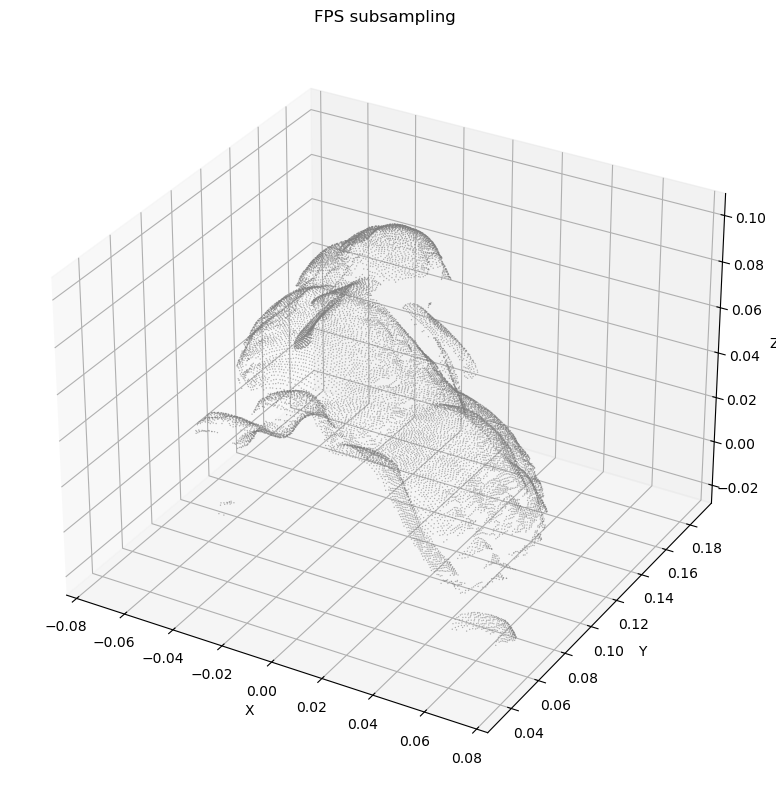

In [48]:
pc_fps.visualize(title="FPS subsampling", backend='matplotlib', save=True)

### 5. Saving files with results

In [27]:
pc_random.to_file("../../reports/task_1/data/bun_random.xyz")
pc_voxel.to_file("../../reports/task_1/data/bun_voxle.xyz")
pc_fps.to_file("../../reports/task_1/data/bun_fps.xyz")

## Zad2b

### 1. Bounding box

In [28]:
min_bounds = [-0.04, 0, 0.02]
max_bounds = [0.04, 0.16, 0.08]

pc_box = pc.filter_bbox(min_bounds, max_bounds)

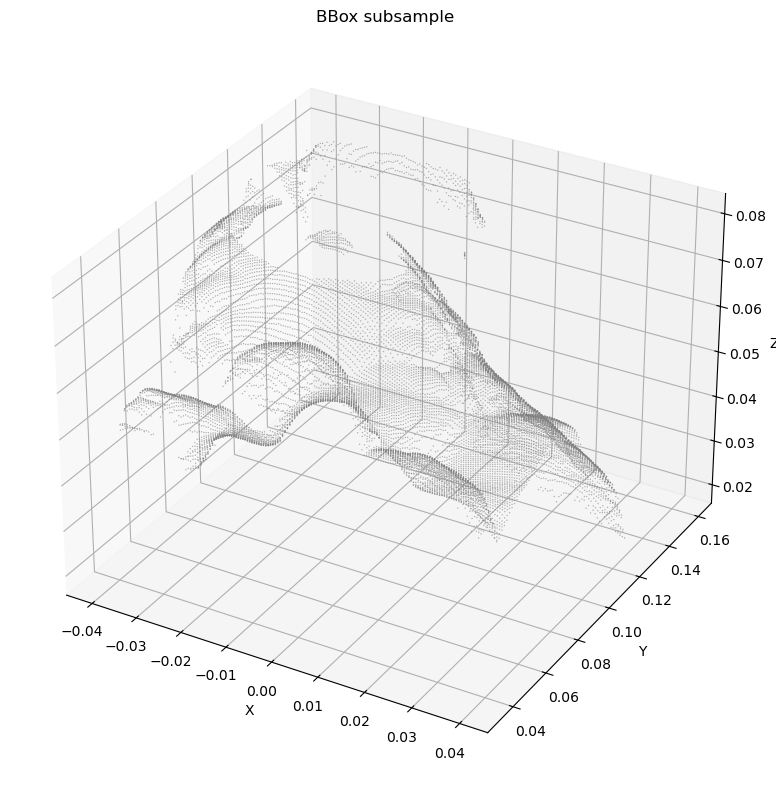

In [29]:
pc_box.visualize(title="BBox subsample", backend='matplotlib', save=True)

### 2. Select by high

In [30]:
min_bounds = [-0.1, 0, 0]
max_bounds = [0.1, 0.2, 0.05]

pc_high = pc.filter_bbox(min_bounds, max_bounds)

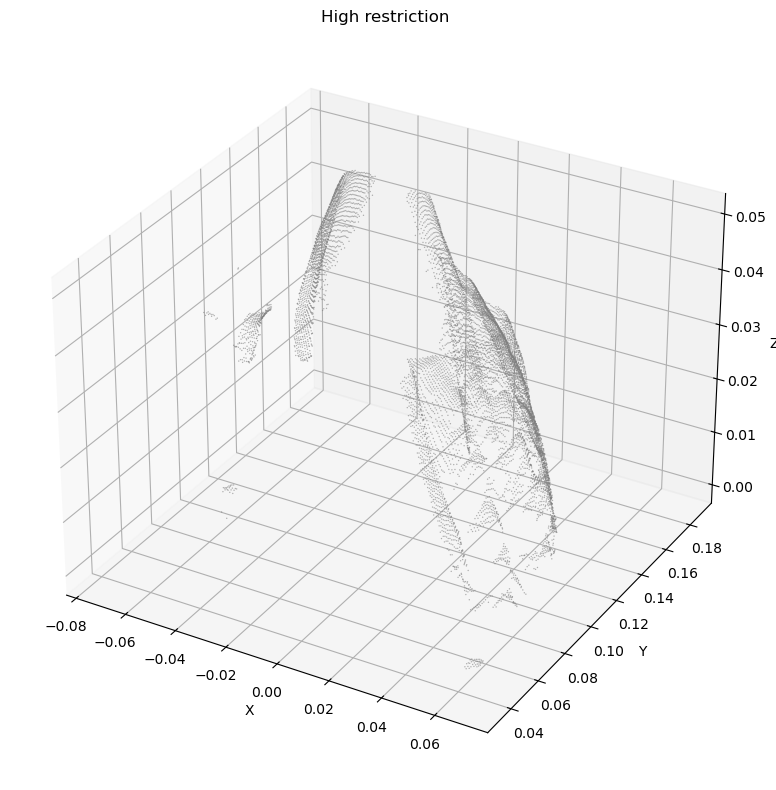

In [31]:
pc_high.visualize(title="High restriction", backend='matplotlib', save=True)

### 3. Select by distance

In [32]:
center = [0, 0.1, 0.05]
radius = 0.05

pc_near = pc.filter(lambda p: np.linalg.norm(p[:3] - center) <= radius)

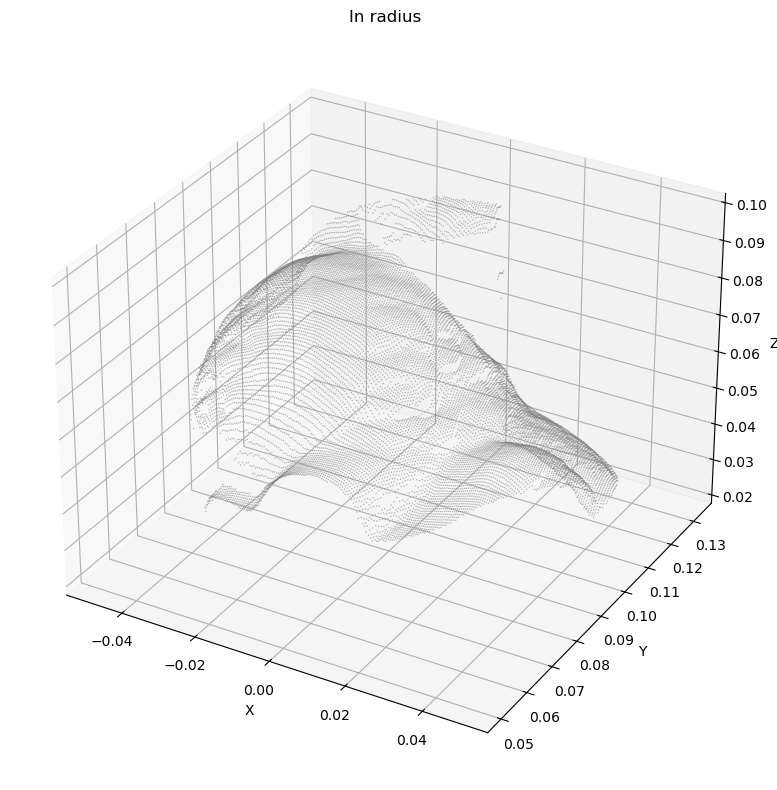

In [33]:
pc_near.visualize(title="In radius", backend='matplotlib', save=True)

### 4. Save files with results

In [34]:
pc_box.to_file("../../reports/task_1/data/bun_box.xyz")
pc_high.to_file("../../reports/task_1/data/bun_high.xyz")
pc_near.to_file("../../reports/task_1/data/bun_near.xyz")